In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
with xr.open_dataset('data/MERRA-2/merged.nc4') as ds:
    ds.load()
    
df = ds.to_dataframe()
df.index.set_names(['lat', 'lon', 'Date'], inplace=True)
df.reset_index(inplace=True)

# take only those values that cover Houston
north, south, east, west = (30.5, 29, -94.5, -96)

filt = (df['lat'] > south) & (df['lat'] < north) & (df['lon'] > west) & (df['lon'] < east)
df = df[filt]

# convert PM2.5 to be in units of micrograms / m^3
df['PM2.5'] = df['PM2.5'] * 1e9

In [4]:
df

,lat,lon,Date,SSSMASS25,DUSCATAU,BCSCATAU,DUEXTTAU,BCFLUXU,OCFLUXV,BCANGSTR,...,SLP,TQV,V2M,TROPQ,V10M,U50M,U10M,QV2M,TROPPV,QV10M
94256,29.5,-95.625,2015-01-01,4.533399e-10,0.002021,0.002087,0.002156,0.000004,0.000019,1.512882,...,102502.109375,33.872681,-2.449461,0.000014,-3.480748,-2.715095,-2.106504,0.005170,12385.588867,0.005072
94257,29.5,-95.625,2015-01-02,6.423546e-10,0.001370,0.002210,0.001459,0.000005,0.000035,1.496467,...,101835.914062,35.265064,-1.914652,0.000012,-2.711771,-1.203307,-0.913161,0.006570,11865.560547,0.006467
94258,29.5,-95.625,2015-01-03,5.319692e-10,0.001622,0.003452,0.001729,0.000011,0.000058,1.491463,...,101459.898438,35.948349,-1.075062,0.000006,-1.526446,3.363282,2.576123,0.007270,11325.949219,0.007129
94259,29.5,-95.625,2015-01-04,9.017004e-10,0.004917,0.001290,0.005263,0.000008,0.000015,1.427629,...,102459.328125,8.960220,-2.824340,0.000018,-4.190116,1.659939,1.085879,0.005313,12323.019531,0.005246
94260,29.5,-95.625,2015-01-05,1.128566e-09,0.001995,0.001070,0.002119,0.000004,0.000009,1.458390,...,103588.531250,4.468480,-2.647162,0.000015,-3.835776,-1.352524,-0.990397,0.003287,13011.084961,0.003148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120555,30.0,-95.000,2020-12-27,2.644830e-09,0.004314,0.000919,0.004610,0.000004,-0.000003,1.420772,...,101785.757812,17.180527,1.702342,0.000003,3.421182,-2.415095,-1.175590,0.008967,9196.285156,0.008873
120556,30.0,-95.000,2020-12-28,2.339227e-09,0.003801,0.000975,0.004061,0.000004,0.000005,1.430284,...,102062.609375,21.724472,1.224436,0.000004,2.619898,-2.311006,-1.453111,0.010594,10317.959961,0.010533
120557,30.0,-95.000,2020-12-29,2.954295e-09,0.002281,0.000758,0.002430,0.000004,0.000015,1.418531,...,102127.914062,19.218693,1.293051,0.000003,2.436874,-6.182795,-3.710495,0.009742,9860.671875,0.009654
120558,30.0,-95.000,2020-12-30,5.271861e-09,0.001837,0.000935,0.001960,0.000005,0.000028,1.424324,...,101397.546875,25.310759,1.794293,0.000002,3.386426,-4.566867,-2.814300,0.012001,10461.372070,0.011901


### Colorscheme

https://www.schemecolor.com/announce.php

In [5]:
train_filt = df['Date'] < '2019-01-01'
val_filt = (df['Date'] > '2018-12-31') & (df['Date'] < '2020-01-01')
test_filt = df['Date'] > '2019-12-31'

def subset_dataframe(df, filt):
    features_to_keep = {
        'PS': 'Surface pressure',
        'QV2M': '2-meter specific humidity',
        'QV10M': '10-meter specific humidity',
        'T2M': '2-meter air temperature',
        'T10M' : '10-meter air temperature',
        'U2M': '2-meter eastward wind',
        'V2M': '2-meter northward wind',
        'U50M': '50-meter eastward wind',
        'V50M': '50-meter northward wind',
        'U10M': '10-meter eastward wind',
        'V10M': '10-meter northward wind',
        'TQL': 'Total precipitable liquid water',
        'TQI': 'Total precipitable ice water',
        'TQV': 'Total precipitable water vapor',
        'CLDTOT': 'Total cloud area fraction',
        'PM2.5': 'PM2.5',
        'AODANA': 'Aerosol Optical Depth Analysis',
        'AODINC' : 'Aerosol Optical Depth Analysis Increment',
        'TS' : 'surface skin temperature',
        'Date': 'Date',
        'lat': 'latitude',
        'lon': 'longitude'
    }
    df = df[filt].loc[:, features_to_keep.keys()] \
        .set_index('Date') \
        .sort_index()
    
    df['Month'] = df.index.month
    return df


train = subset_dataframe(df, train_filt)
val = subset_dataframe(df, val_filt)
test = subset_dataframe(df, test_filt)

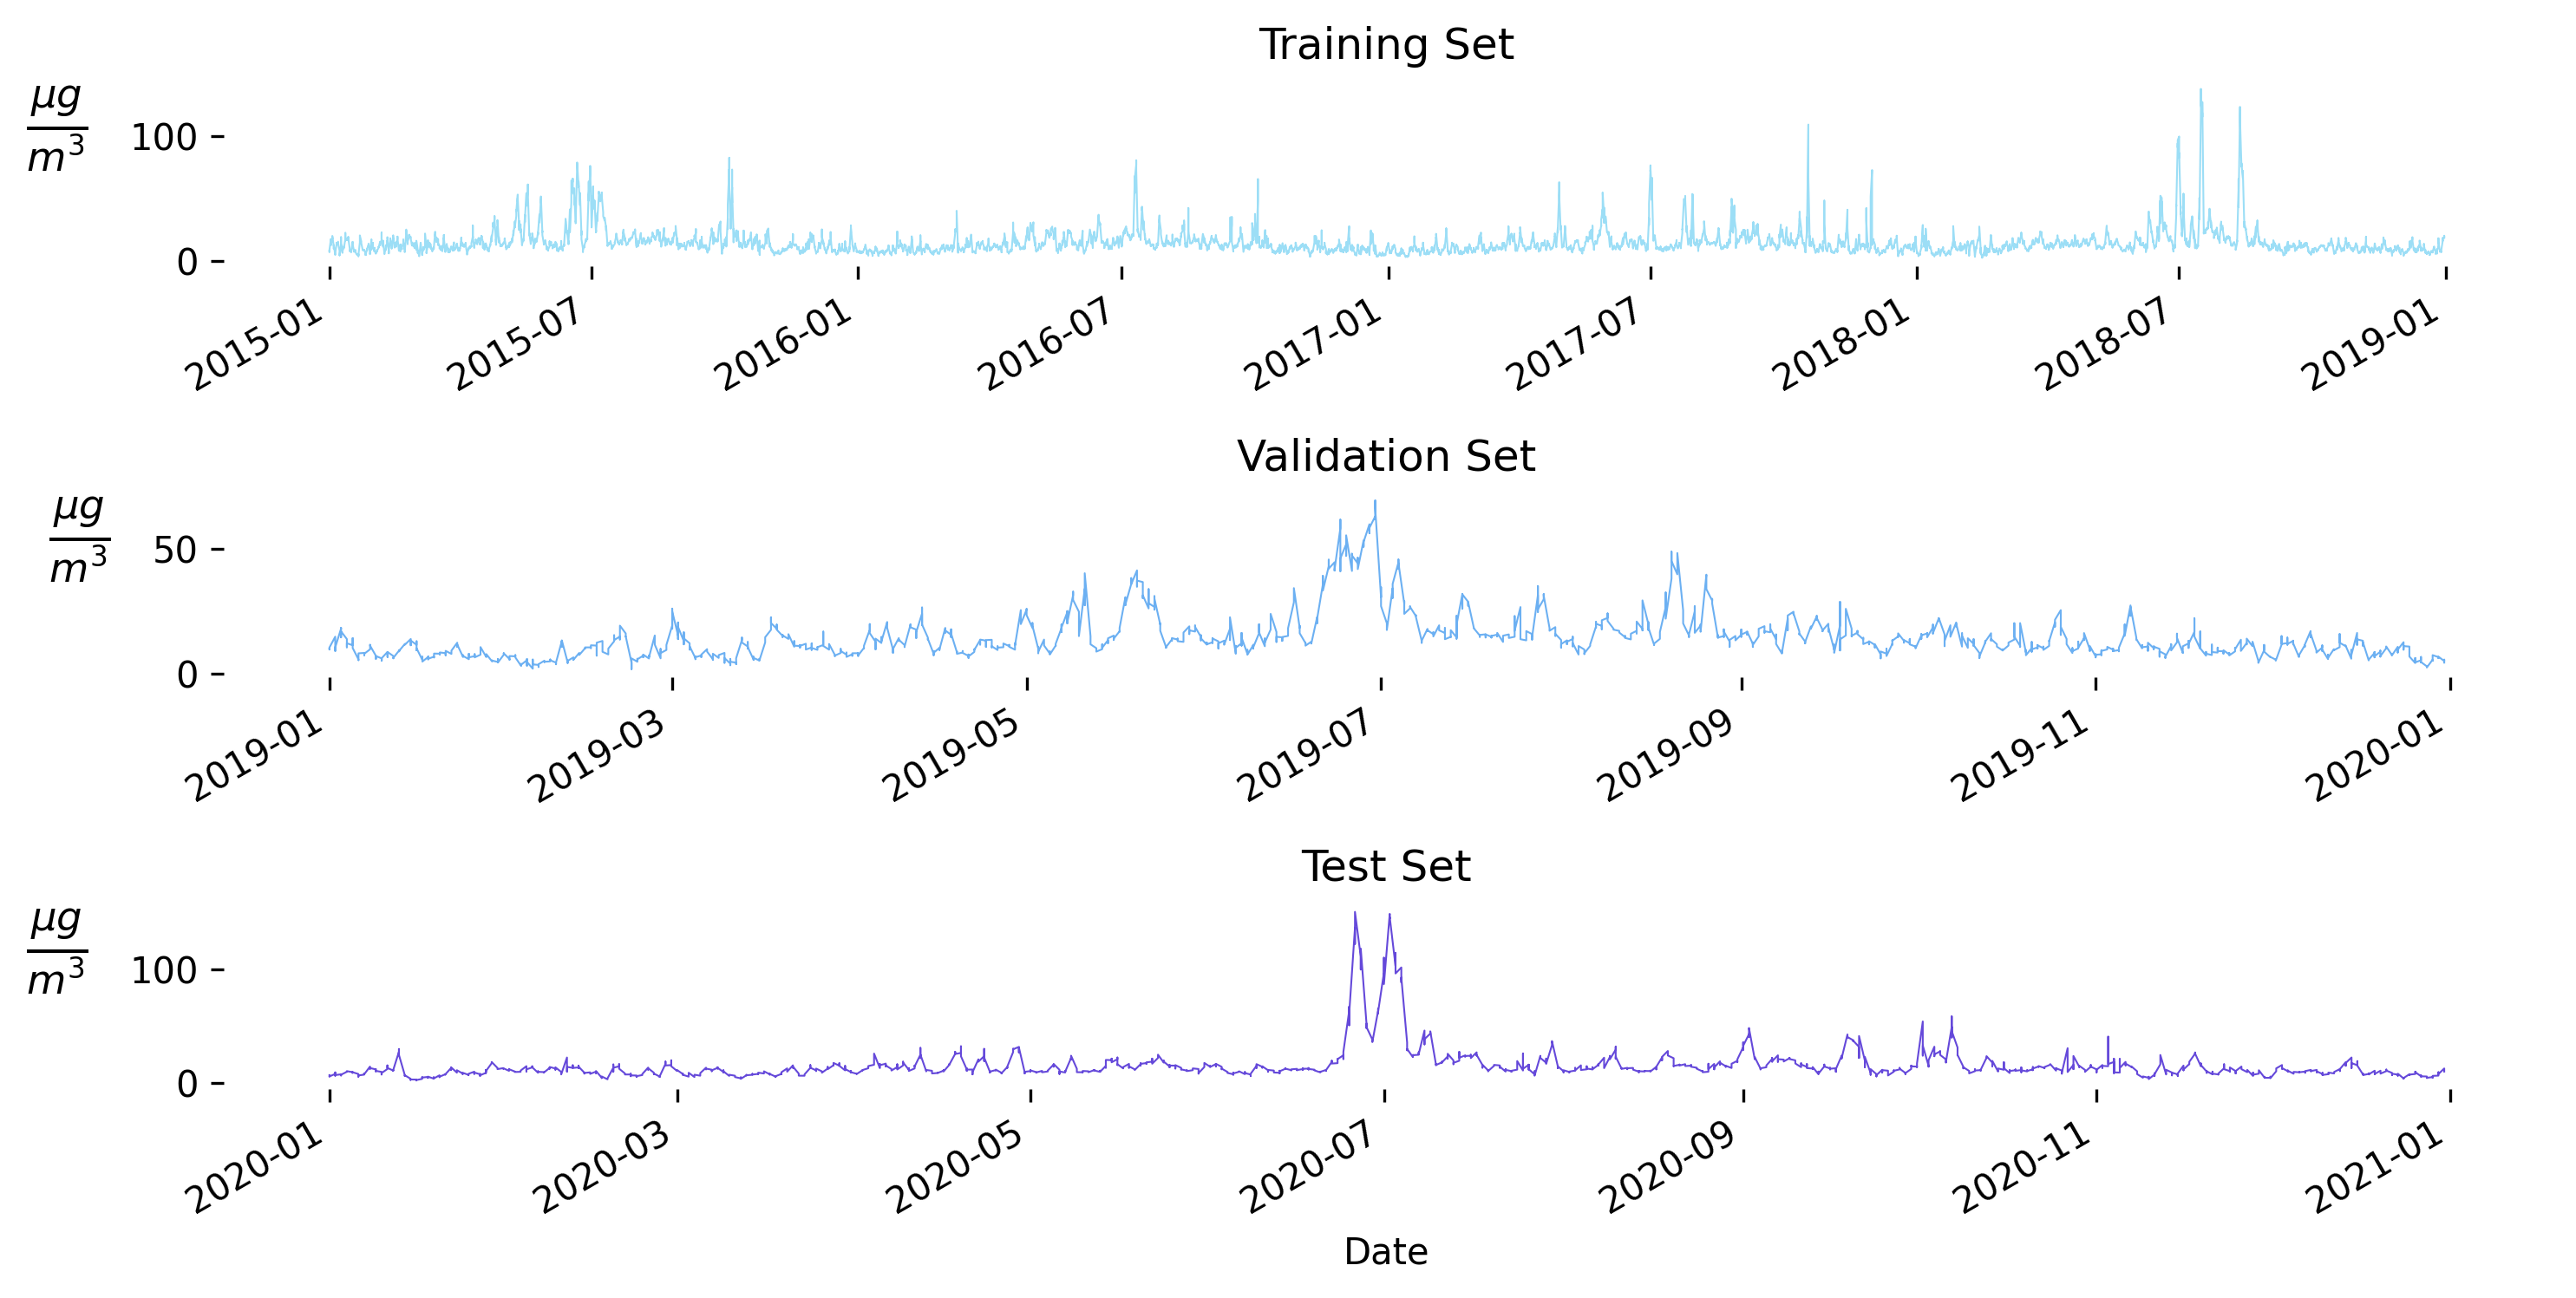

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5.09), dpi=300)

train['PM2.5'].plot(ax = ax1, lw=.5, color='#9CDEF6')
val['PM2.5'].plot(ax = ax2, lw=.5, color='#6CB0F2')
test['PM2.5'].plot(ax = ax3, lw=.5, color='#6549DA')

ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title('Training Set')
ax2.set_title('Validation Set')
ax3.set_title('Test Set')

for ax in [ax1, ax2, ax3]:
    ax.set_ylabel(r'$\frac{\mu g}{m^3}$', rotation=0, fontsize=16, labelpad=20)
    
fig.tight_layout()

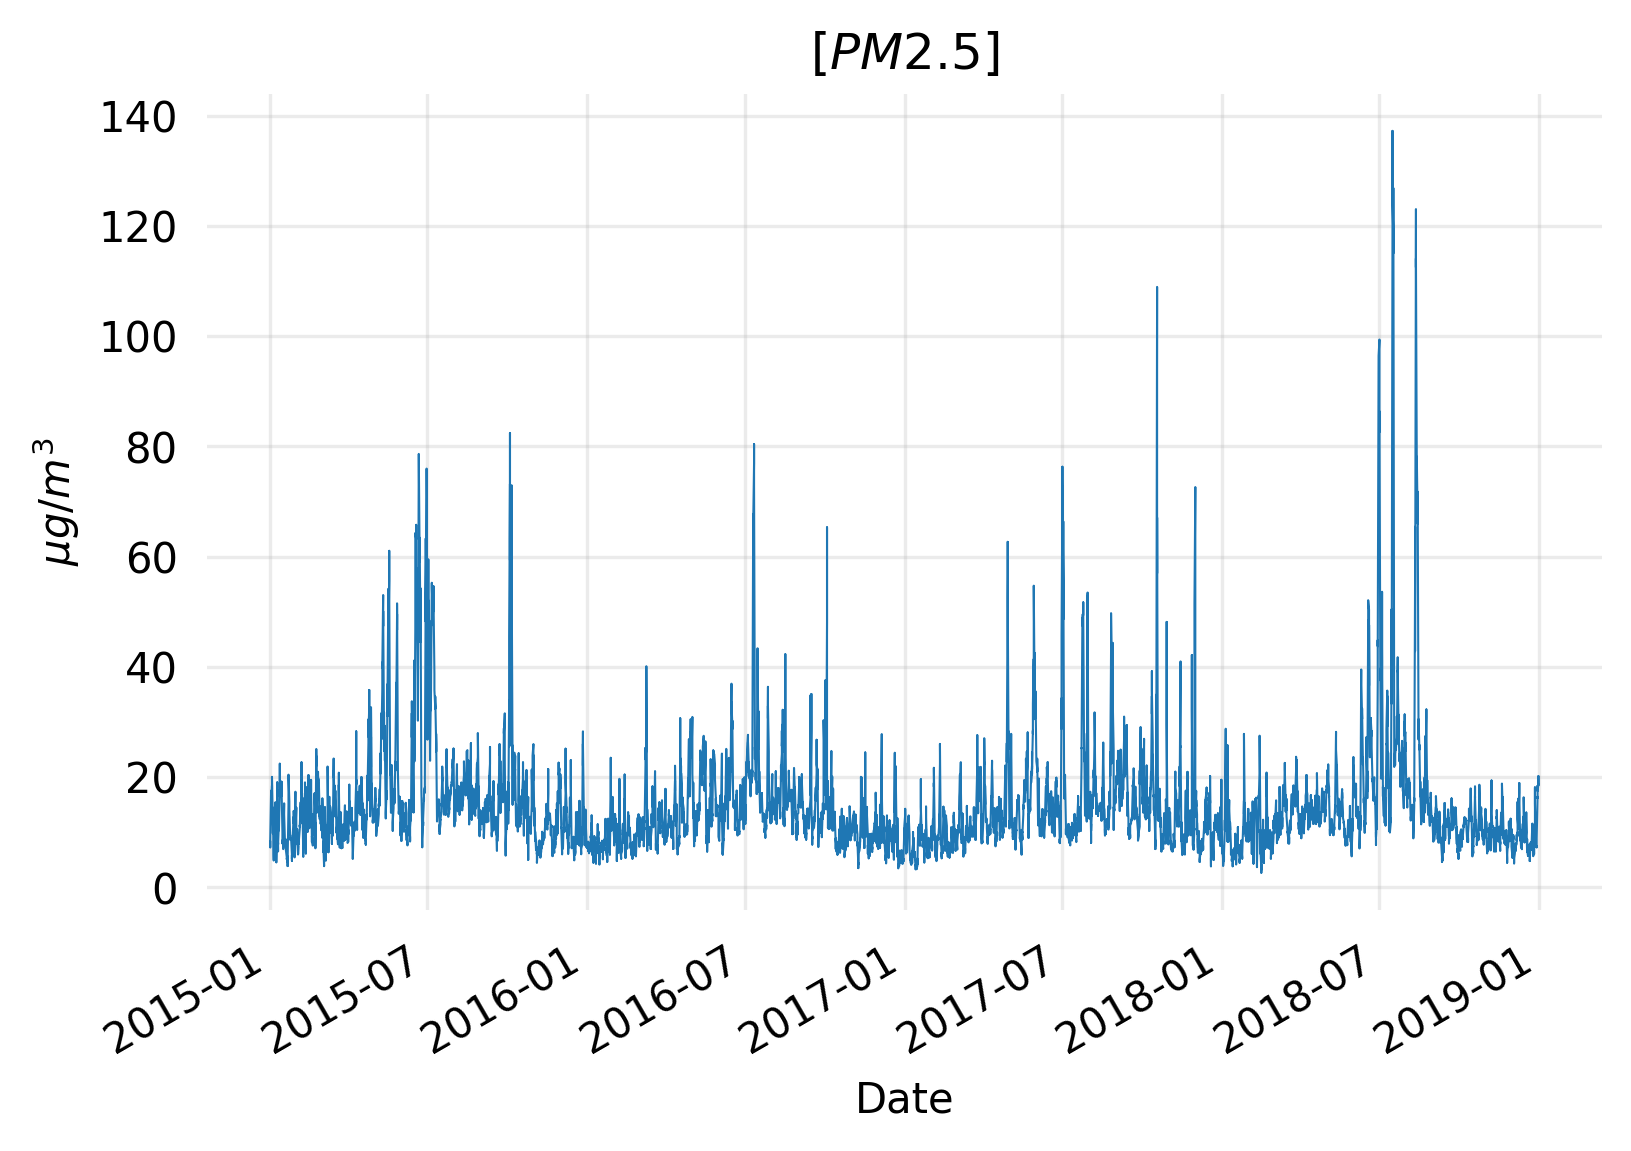

In [7]:
fig, ax = plt.subplots(dpi=300)

# train.resample('D').mean().plot(y='PM2.5', ax=ax, lw=0.5, legend=False)
train.plot(y='PM2.5', ax=ax, lw=0.5, legend=False)

# ax.axvspan(pd.Timestamp('2018-07-01'), pd.Timestamp('2018-07-30'), color='red', alpha=0.4)

ax.tick_params(axis='both', labelsize=10, width=0, which='both')
ax.grid(True, alpha=0.25)

ax.set_ylabel(r'$\mu g/m^3$')

ax.set_title('$[PM2.5]$');

In [8]:
from sklearn import preprocessing
import scipy.stats as stats

def histogram_density_plot(df, nbins = 30, by = None, title = None, bin_fontsize = 8, tick_fontsize=6, xlabel=None, ylabel=None, dpi=600, xmin= 0):
    fig, ax = plt.subplots(dpi=dpi)

    density = stats.kde.gaussian_kde(df[by].values)
    x = np.arange(xmin, df[by].values.max(), .1)
    density = density(x)

    ax.plot(x, density, alpha=0.7, lw=1, color='#9CDEF6')
    ax.fill_between(x, density, alpha=0.4, color='#9CDEF6')

    n, bins, patches = ax.hist(df[by], bins=nbins, rwidth=0.75, density=True, alpha=0.7, zorder=3, color='#6549DA')
    ax.set_xticks(bins)
    counts = df[by].value_counts(bins=nbins, sort=False)
    for count, bar in zip(counts, patches):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+.0005, f'{count}', fontsize=bin_fontsize, ha='center')

    ax.set_xlim((xmin, df[by].values.max()))
    ax.tick_params(axis='both', labelsize=tick_fontsize, width=0, which='both')
    ax.grid(True, alpha=0.2)
    
    if title is not None:
        ax.set_title(title)
    
    if xlabel is not None:
        ax.set_xlabel(xlabel)
        
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
    return bins

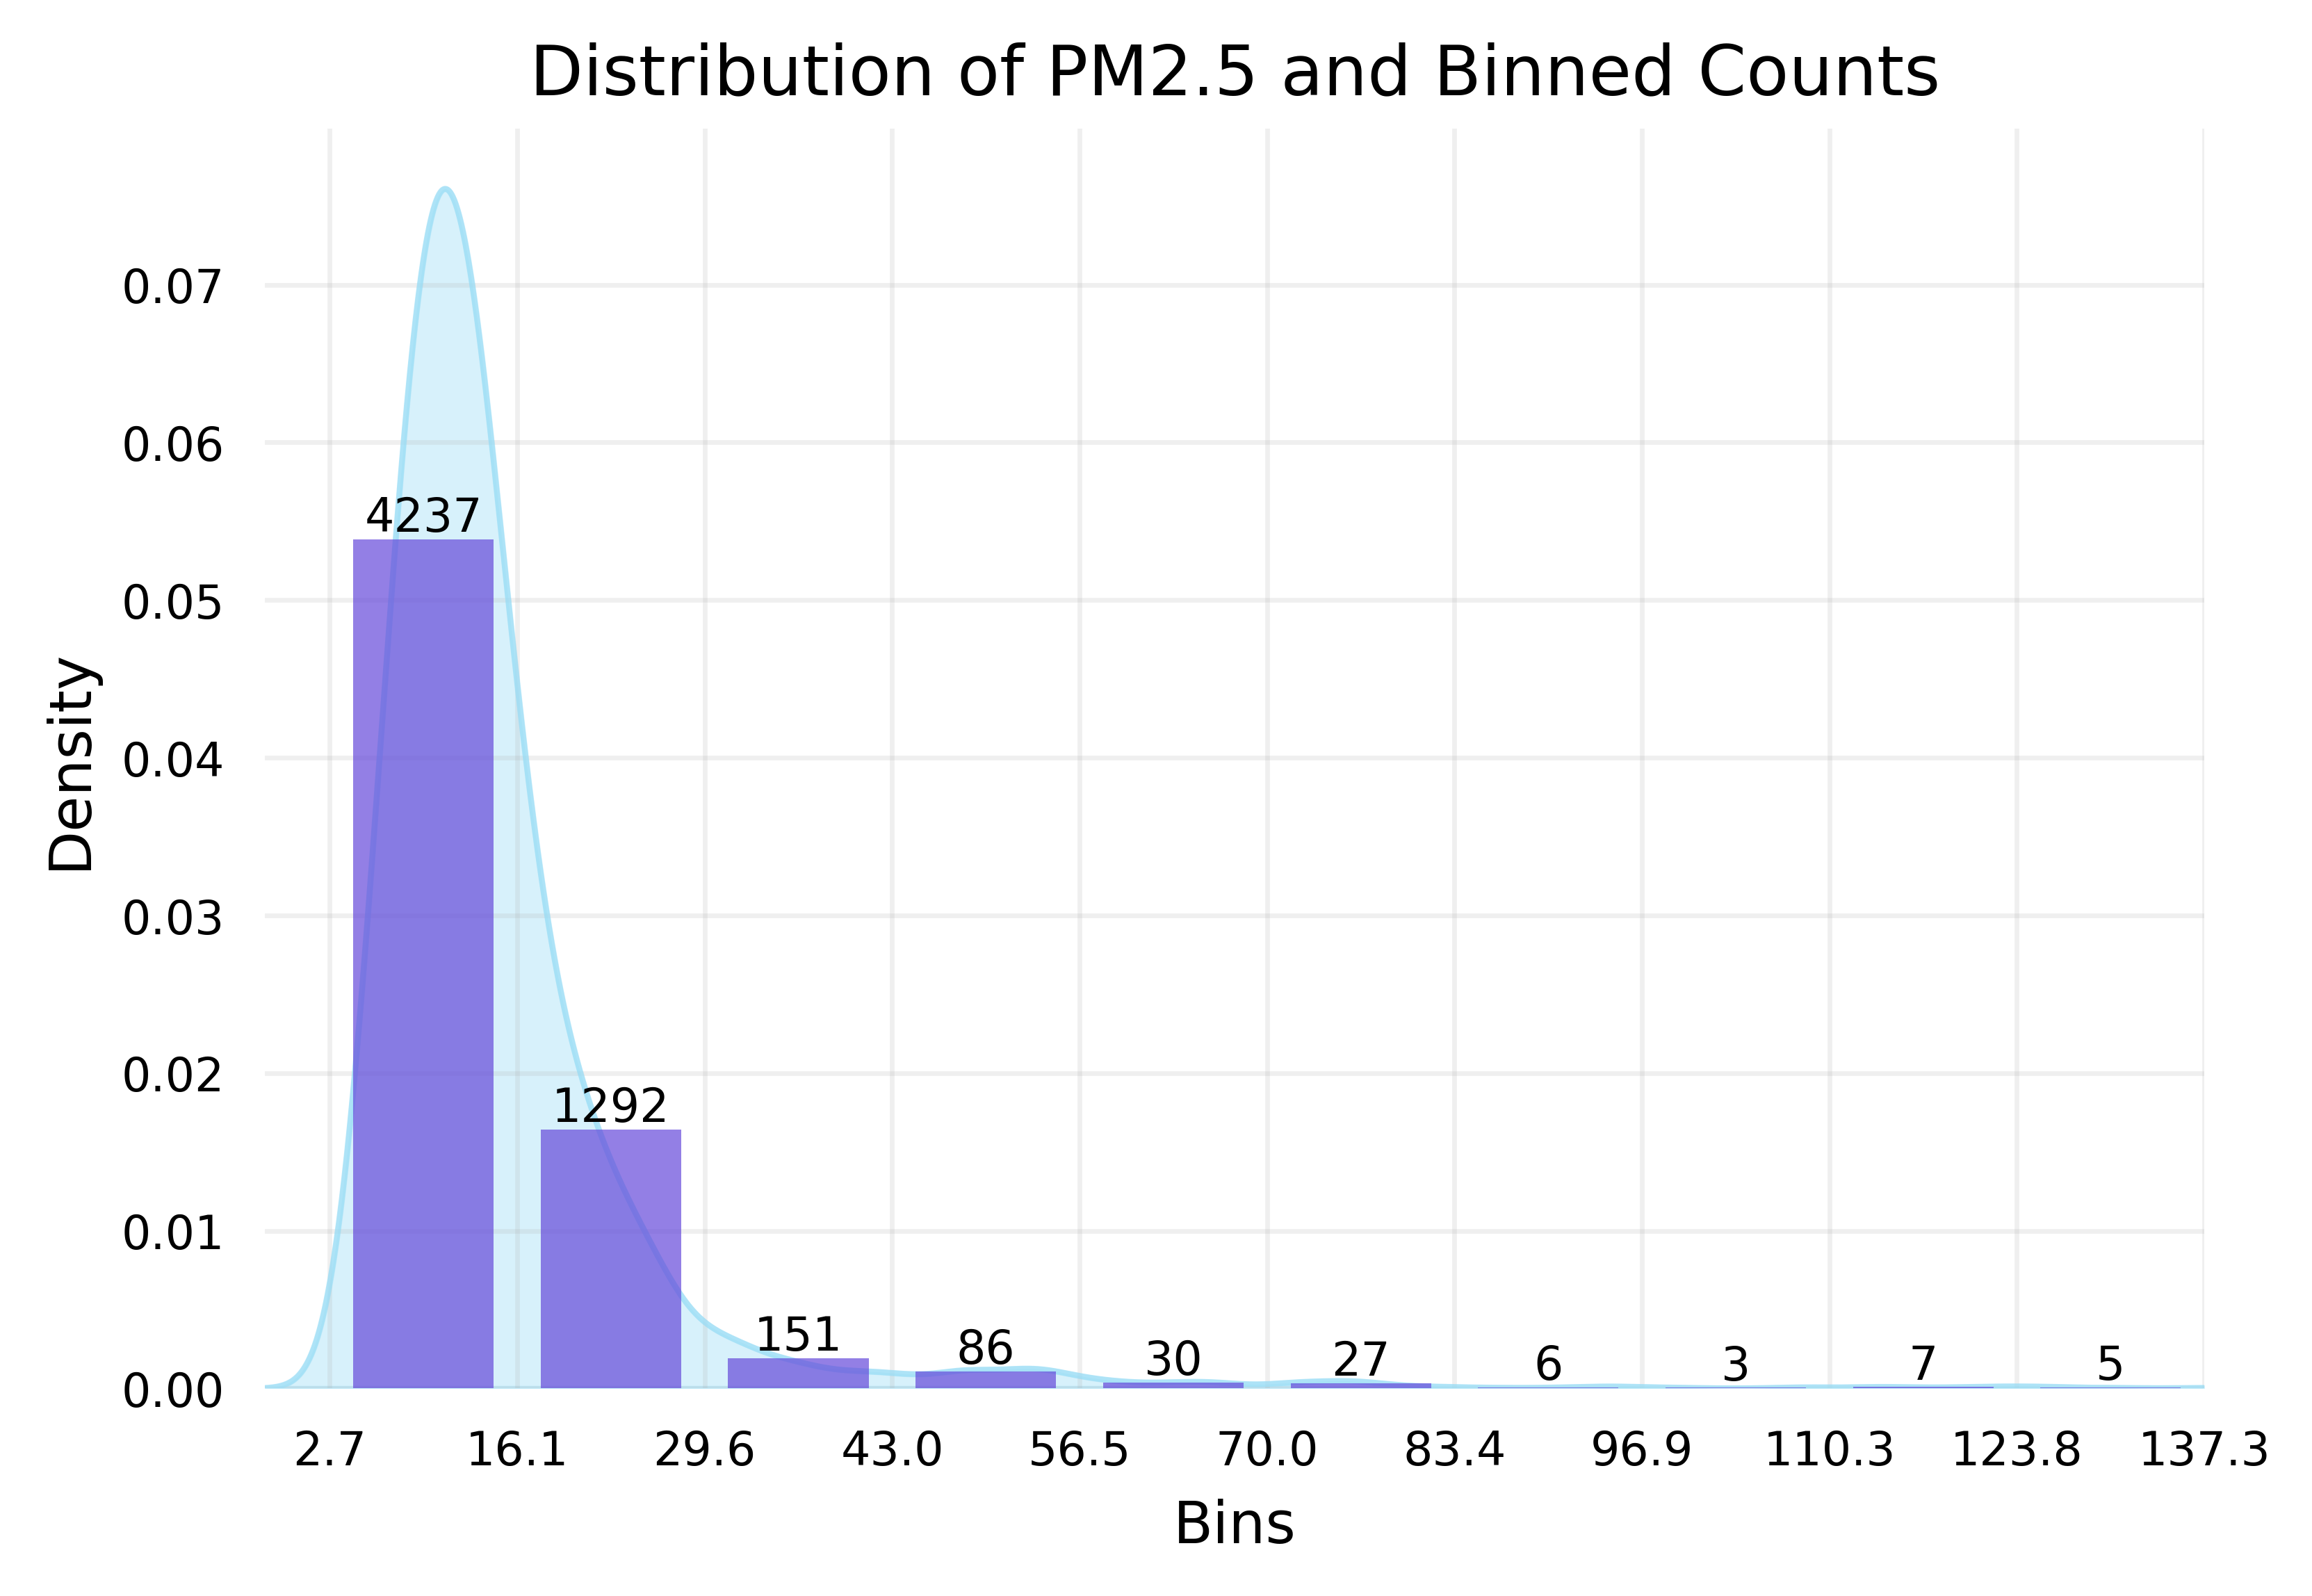

In [9]:
# daily = train.resample('D').mean()
bins = histogram_density_plot(train, 
                       by='PM2.5', 
                       nbins=10, 
                       title="Distribution of PM2.5 and Binned Counts", 
                       tick_fontsize=8,
                       dpi=600,
                       xlabel='Bins',
                       ylabel='Density',
                       xmin=-2)

In [10]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn import preprocessing

X, y = train.drop('PM2.5', axis=1), train['PM2.5']

features = SelectKBest(mutual_info_regression, k=10)
features.fit(X, y)

x = X.loc[:, features.get_support()]

pd.options.display.float_format = '{:.2f}'.format

translations = {
    'PS': 'Surface pressure',
    'QV2M': '2-meter specific humidity',
    'QV10M': '10-meter specific humidity',
    'T2M': '2-meter air temperature',
    'T10M' : '10-meter air temperature',
    'U2M': '2-meter eastward wind',
    'V2M': '2-meter northward wind',
    'U50M': '50-meter eastward wind',
    'V50M': '50-meter northward wind',
    'U10M': '10-meter eastward wind',
    'V10M': '10-meter northward wind',
    'TQL': 'Total precipitable liquid water',
    'TQI': 'Total precipitable ice water',
    'TQV': 'Total precipitable water vapor',
    'CLDTOT': 'Total cloud area fraction',
    'PM2.5': 'PM2.5',
    'AODANA': 'Aerosol Optical Depth Analysis',
    'AODINC' : 'Aerosol Optical Depth Analysis Increment',
    'TO3' : 'total column ozone',
    'TS' : 'surface skin temperature',
    'Date': 'Date',
    'lat': 'latitude',
    'lon': 'longitude'
}

scaler = preprocessing.StandardScaler()
scaler.fit(x)

scaled_x = x.copy()
scaled_x[scaled_x.columns] = scaler.transform(x)

In [11]:
x.rename(translations, axis=1)

,Surface pressure,2-meter specific humidity,10-meter specific humidity,2-meter air temperature,10-meter air temperature,Total precipitable ice water,Total precipitable water vapor,Aerosol Optical Depth Analysis,surface skin temperature,Month
Date,,,,,,,,,,
2015-01-01,102206.73,0.01,0.01,279.77,279.66,0.03,33.87,0.14,280.19,1
2015-01-01,101955.41,0.00,0.00,278.57,278.50,0.04,32.57,0.13,278.81,1
2015-01-01,102225.73,0.01,0.00,279.14,279.06,0.03,32.87,0.13,279.65,1
2015-01-01,102381.41,0.01,0.01,281.63,281.46,0.02,34.21,0.14,283.21,1
2015-01-02,101544.73,0.01,0.01,282.23,282.13,0.04,35.27,0.21,282.72,1
...,...,...,...,...,...,...,...,...,...,...
2018-12-30,101608.48,0.01,0.01,281.96,281.81,0.06,36.12,0.40,282.57,12
2018-12-31,101199.45,0.01,0.01,284.40,284.38,0.04,30.30,0.20,285.28,12
2018-12-31,101027.45,0.01,0.01,282.82,282.80,0.05,27.94,0.21,283.12,12


In [12]:
y.describe()

count   5844.00
mean      14.94
std       10.98
min        2.65
25%        9.33
50%       12.41
75%       16.66
max      137.26
Name: PM2.5, dtype: float64

In [13]:
X_val, y_val = val.drop('PM2.5', axis=1), val['PM2.5']

X_val = X_val.loc[:, features.get_support()]

In [14]:
from sklearn.model_selection import StratifiedKFold

def stratified_kfold(y, k=10):
    # stratified k-fold cross validation: https://stackoverflow.com/a/54946733/5217293
    y_cat = pd.cut(y, k, labels=range(k))
    return StratifiedKFold(k).split(x, y_cat)

def summarize_scores(scores):
    r2 = scores["test_r2"].mean()
    mae = np.abs(scores["test_neg_mean_absolute_error"]).mean()
    rmse = np.abs(scores["test_neg_root_mean_squared_error"]).mean()
    return r2, mae, rmse
    
def print_scores(scores):
    r2, mae, rmse = summarize_scores(scores)
    
    print('R2, MAE, RMSE')
    print(f'{r2:.2f}, {mae:.2f}, {rmse:.2f}')

In [15]:
scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# Linear Models

## Ordinary Least Squares

In [16]:
vals = list(map(list, zip(bins, bins[1:])))
vals = [f'{a:.1f} - {b:.1f}' for a, b in vals]
vals

['2.7 - 16.1',
 '16.1 - 29.6',
 '29.6 - 43.0',
 '43.0 - 56.5',
 '56.5 - 70.0',
 '70.0 - 83.4',
 '83.4 - 96.9',
 '96.9 - 110.3',
 '110.3 - 123.8',
 '123.8 - 137.3']

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


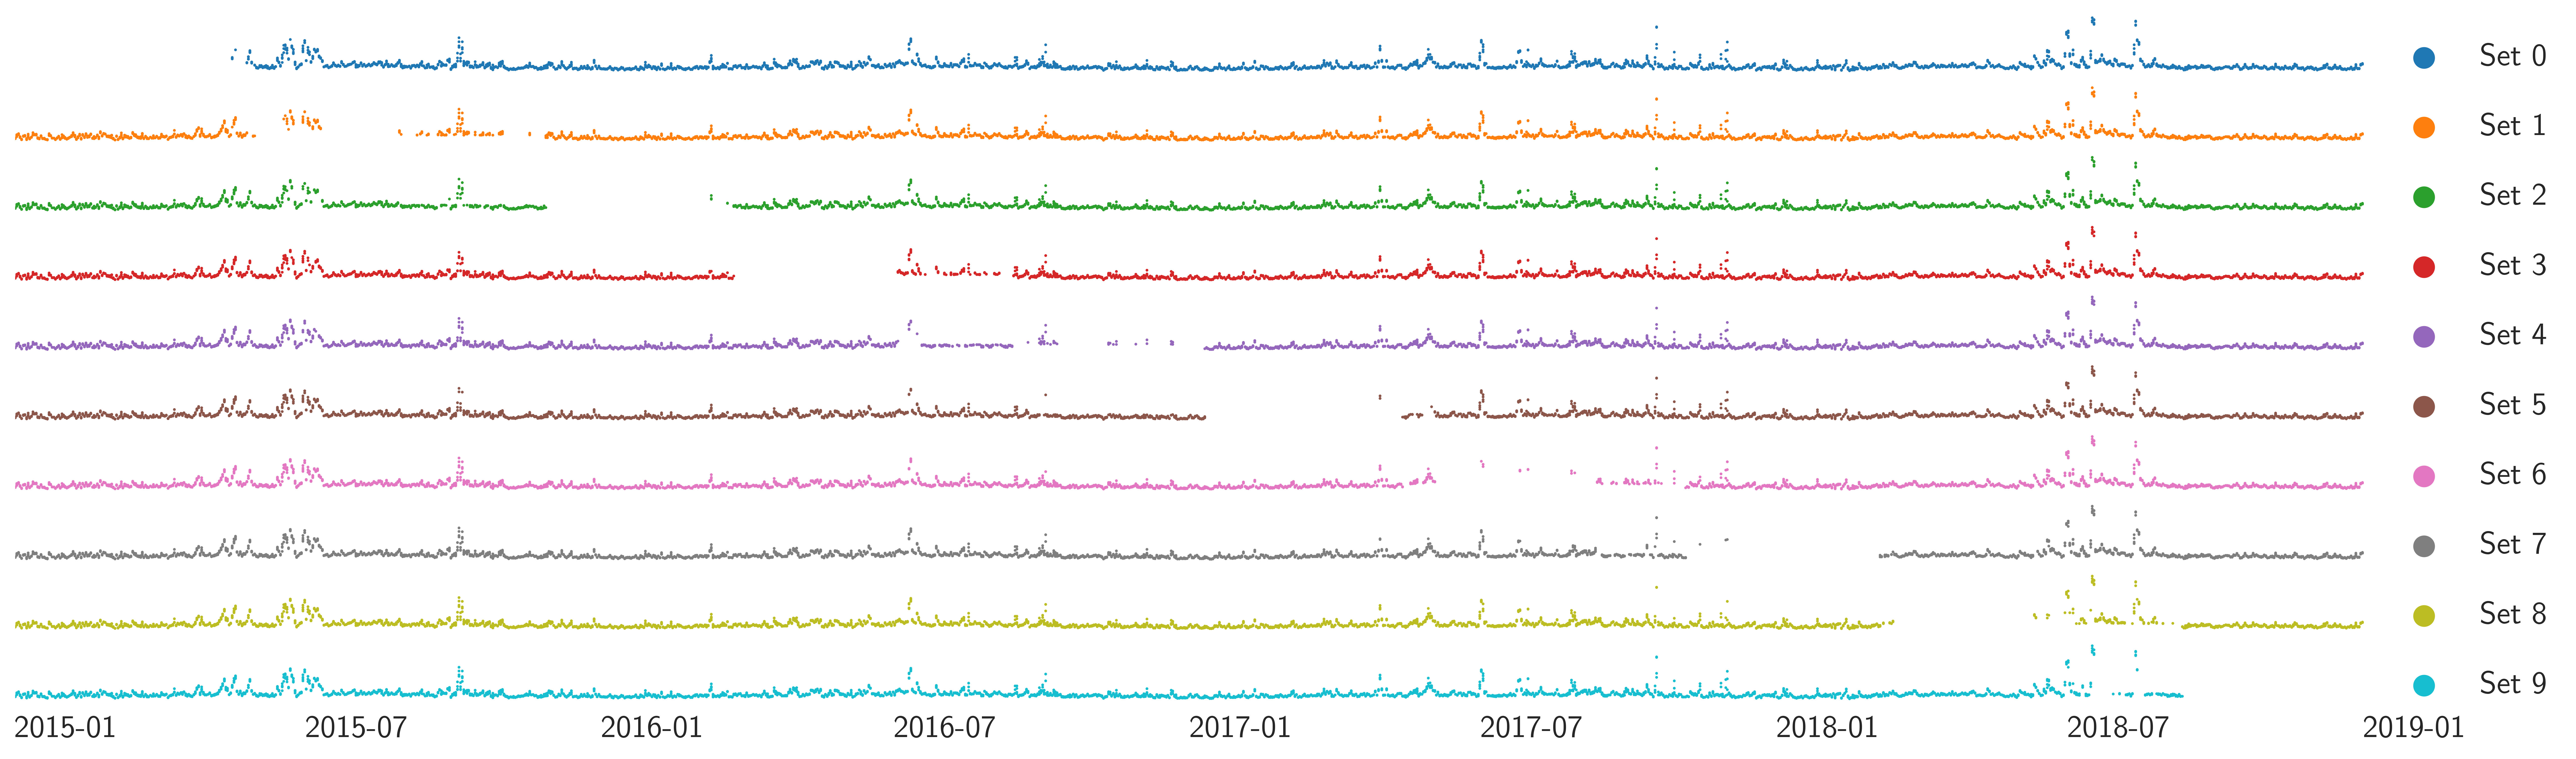

In [36]:
from matplotlib.pyplot import cm
import datetime

counts = {i: [] for i in range(10)}

fig, axes = plt.subplots(10, 1, figsize=(20, 6), dpi=600)

color=iter(cm.tab10(np.linspace(0,1,10)))

dstart = datetime.datetime(2015,1,1)
dend = datetime.datetime(2019,1,1)

for idx, ((train_idx, test_idx), ax) in enumerate(zip(stratified_kfold(y, 10), axes)):
    _y = y.iloc[train_idx]
    ax.scatter(_y.index, _y, label=f'Set {idx}', color=next(color), s=1)
    c = pd.cut(_y, bins=bins, labels=range(10), ordered=False).value_counts()
    for i in range(10):
        counts[i].append(c.loc[i])
        
    ax.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15, markerscale=10)
    
    ax.set_xlabel('')
    ax.set_yticklabels([])
    ax.set_xlim((dstart, dend))
    ax.grid(alpha=0.4)
        
for ax in axes[:-1]:
    ax.set_xticklabels([])
    
axes[-1].tick_params(axis='x', labelsize=15, rotation=0)

for tick in axes[-1].xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")


In [18]:
bin_counts = pd.DataFrame(counts, index=[f'Set {i}' for i in range(10)])
bin_counts.columns = vals
bin_counts = bin_counts.T
bin_counts.index = bin_counts.index.set_names('Bin Range microgram/m3')
bin_counts

,Set 0,Set 1,Set 2,Set 3,Set 4,Set 5,Set 6,Set 7,Set 8,Set 9
Bin Range microgram/m3,,,,,,,,,,
2.7 - 16.1,3812,3812,3812,3812,3812,3812,3812,3814,3813,3813
16.1 - 29.6,1163,1163,1163,1163,1163,1163,1163,1162,1162,1163
29.6 - 43.0,136,136,136,136,136,136,136,136,136,135
43.0 - 56.5,77,77,77,77,77,77,78,78,78,78
56.5 - 70.0,27,27,27,27,27,27,27,27,27,27
70.0 - 83.4,24,24,24,25,25,25,24,24,24,24
83.4 - 96.9,5,5,6,6,6,6,5,5,5,5
96.9 - 110.3,3,3,3,2,2,2,3,3,3,3
110.3 - 123.8,7,7,6,6,6,6,6,6,6,7


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

lm = LinearRegression()

reg_scores = cross_validate(lm, x, y, 
                            cv=stratified_kfold(y, 10), 
                            scoring=scoring)

lm.fit(x, y)

print_scores(reg_scores)

R2, MAE, RMSE
0.34, 5.00, 8.81


/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


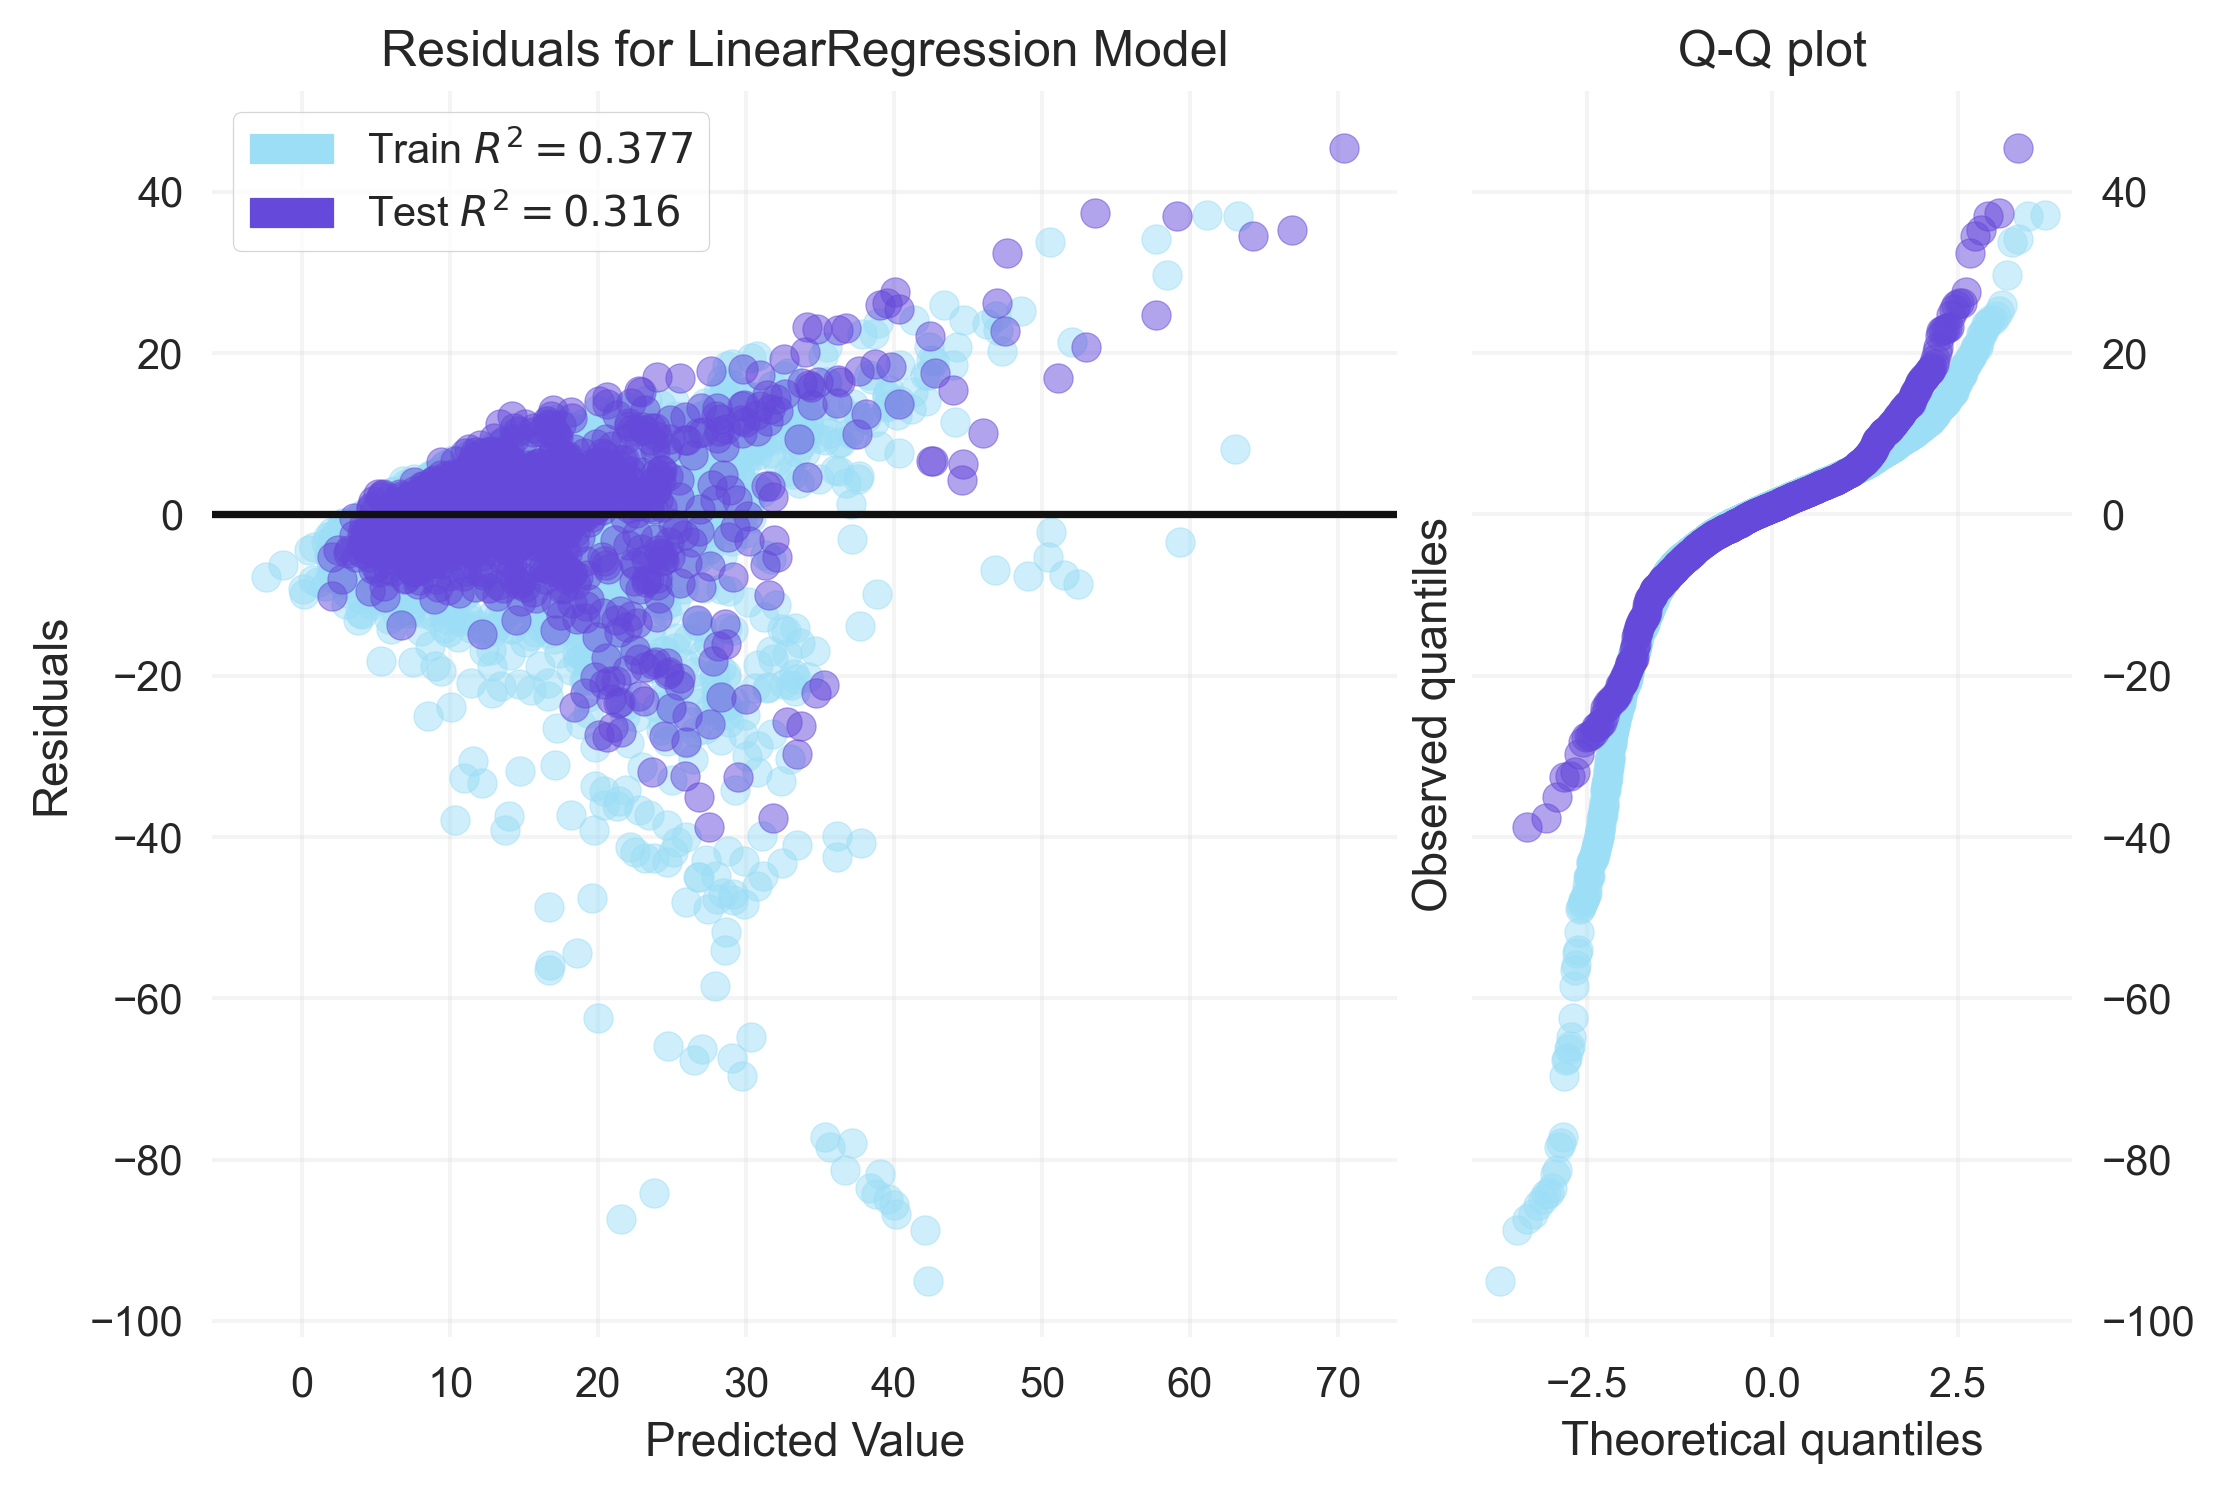

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import ResidualsPlot

fig, ax = plt.subplots(dpi=300)

train_color='#9CDEF6'
test_color='#6549DA'

visualizer = ResidualsPlot(lm, ax=ax, hist=False, qqplot=True, 
                          train_alpha=0.5, 
                          test_alpha=0.5,
                          train_color=train_color,
                          test_color=test_color)

visualizer.fit(x, y)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data

for _ax in fig.get_axes():
    _ax.tick_params(axis='both', labelsize=10, width=0, which='both')
    _ax.grid(True, alpha=0.2)

visualizer.show()    

## Elastic Net

In [21]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(cv=10, 
                       l1_ratio=np.arange(0.1, 1.1, .1),
                       max_iter=10000
                      )

elastic_scores = cross_validate(elastic, scaled_x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

elastic.fit(scaled_x, y)

print_scores(elastic_scores)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.34, 4.91, 8.82


## Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

polynomial_pipe = Pipeline([('poly', PolynomialFeatures()),
                  ('linear', LinearRegression())]) 

params={'poly__degree': [1, 2, 3]}

poly_grid = GridSearchCV(polynomial_pipe, params, cv=10, scoring=scoring, refit='neg_root_mean_squared_error')

poly_grid.fit(x, y)

polynomial_scores = cross_validate(poly_grid.best_estimator_, x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(polynomial_scores)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.49, 4.78, 7.76


## Bayesian Ridge

In [23]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge().fit(x, y)

bayesian_ridge_scores = cross_validate(bayesian_ridge, x, y, 
                            cv=stratified_kfold(y, 10), 
                            scoring=scoring)

bayesian_ridge.fit(x, y)

print_scores(bayesian_ridge_scores)

R2, MAE, RMSE
0.35, 4.98, 8.80


/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [24]:
# poly_grid.best_params_
# poly_grid.best_estimator_.named_steps['poly'].get_feature_names(x.columns)
# poly_grid.best_estimator_.named_steps['linear'].coef_

## Support Vector Regression

In [25]:
from sklearn.svm import SVR

params={'C': np.arange(.5, 10.5, .5)}

svr_grid = GridSearchCV(SVR(), params, cv=10, scoring=scoring, refit='neg_root_mean_squared_error')

svr_grid.fit(scaled_x, y)

svr_scores = cross_validate(svr_grid.best_estimator_, scaled_x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(svr_scores)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.49, 3.93, 7.77


In [26]:
svr_grid.best_params_

{'C': 10.0}

## MARS

In [27]:
# https://github.com/scikit-learn-contrib/py-earth
from pyearth import Earth

model = Earth()
model.fit(x,y)
    
mars_scores = cross_validate(svr_grid.best_estimator_, scaled_x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(mars_scores)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn_contrib_py_earth-0.1.0-py3.9-macosx-11-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn_contrib_py_earth-0.1.0-py3.9-macosx-11-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
/Users/kyle/Documents/HoustonPM2.5/houston/lib/pytho

R2, MAE, RMSE
0.49, 3.93, 7.77


In [28]:
from statsmodels.api import MixedLM



In [29]:
r2 = np.array([f'{i:.2f}' for i in reg_scores['test_r2']])
mae = np.array([f'{-i:.2f}' for i in reg_scores['test_neg_mean_absolute_error']])
rmse = np.array([f'{-i:.2f}' for i in reg_scores['test_neg_mean_absolute_error']])

pd.DataFrame({'R2': r2, 'MAE': mae, 'RMSE': rmse}, index=[f'Set {i}' for i in range(10)]).T

,Set 0,Set 1,Set 2,Set 3,Set 4,Set 5,Set 6,Set 7,Set 8,Set 9
R2,0.45,0.39,0.46,0.04,0.43,0.31,0.24,0.41,0.23,0.47
MAE,5.01,4.66,4.46,6.69,4.65,5.32,5.20,4.81,4.84,4.32
RMSE,5.01,4.66,4.46,6.69,4.65,5.32,5.20,4.81,4.84,4.32


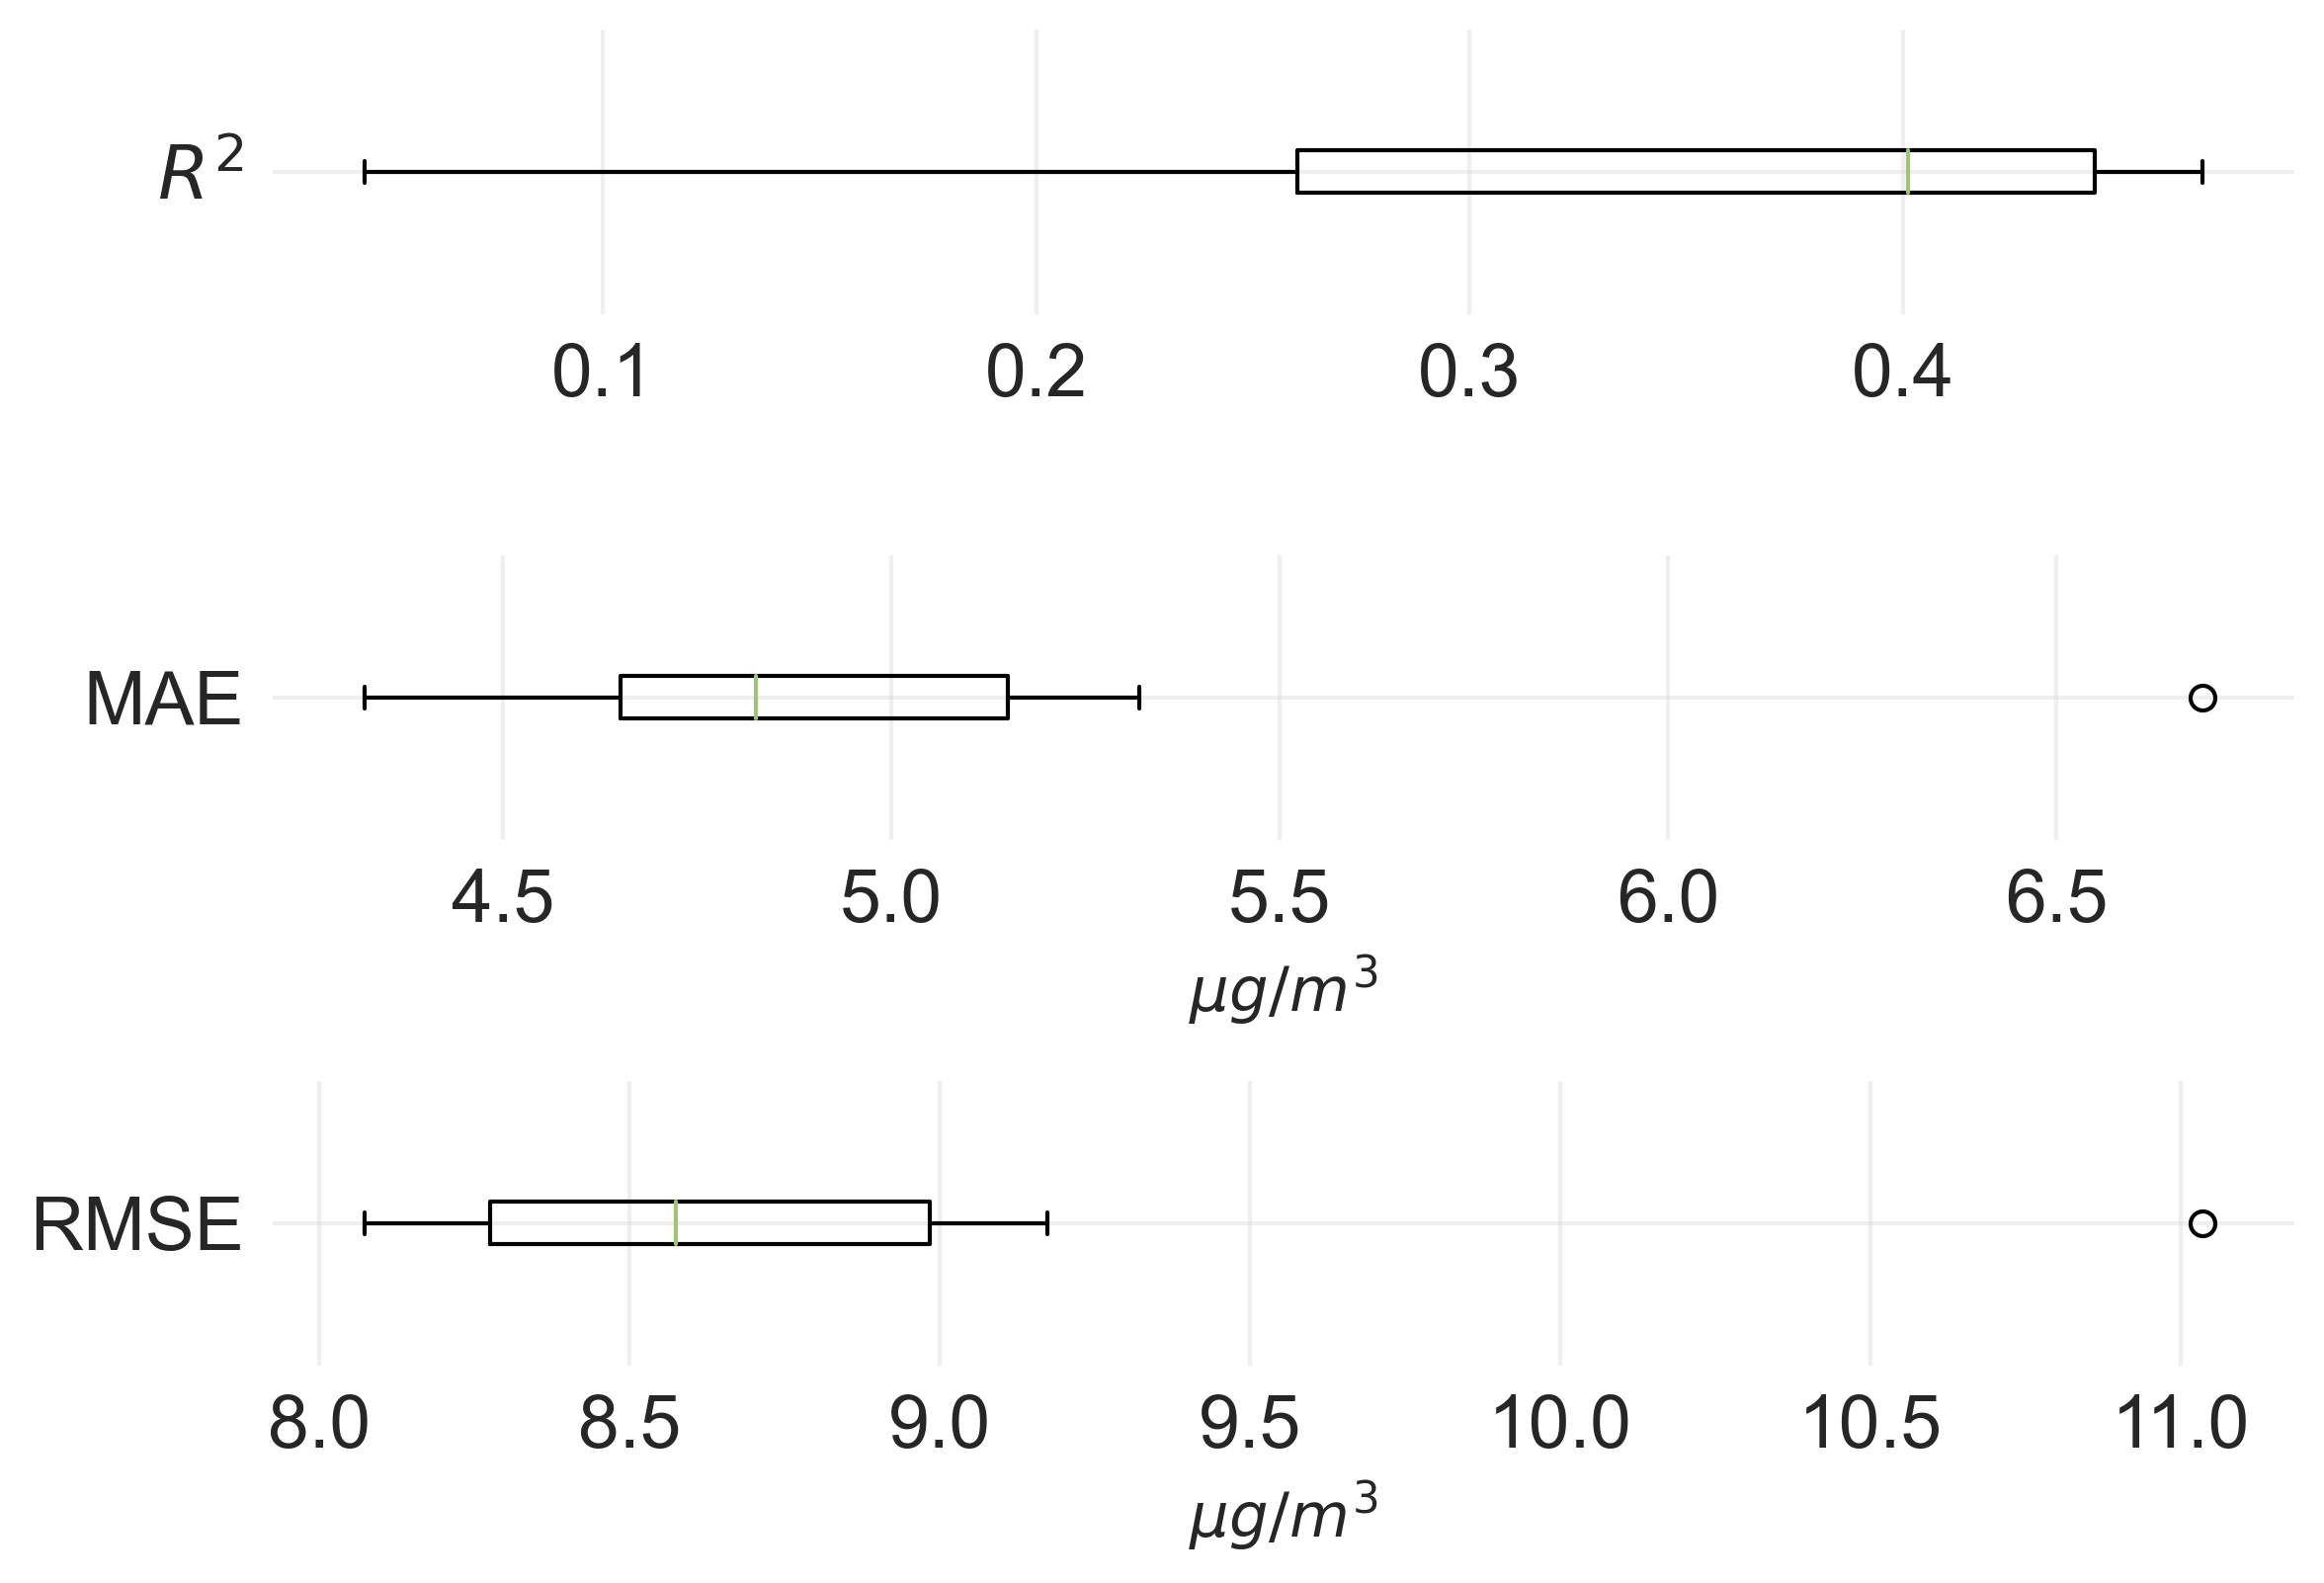

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=300)

ax1.boxplot(reg_scores['test_r2'], labels=['$R^2$'], vert=False)
ax2.boxplot(np.abs(reg_scores['test_neg_mean_absolute_error']), labels=['MAE'], vert=False)
ax3.boxplot(np.abs(reg_scores['test_neg_root_mean_squared_error']), labels=['RMSE'], vert=False)

ax2.set_xlabel(r'$\mu g/m^3$', fontsize=15)
ax3.set_xlabel(r'$\mu g/m^3$', fontsize=15)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', labelsize=18, width=0, which='both')
    ax.grid(True, alpha=0.3)
    
fig.tight_layout()

In [58]:
def score_boxplot(score_type, *args, title='', labels=None, ax=None, tick_fontsize=10, title_fontsize=20):
    if labels is None:
        raise ValueError("Provide labels")
    scores = [np.abs(arg[score_type]) for arg in args]
    
    if ax is None:
        fig, ax = plt.subplots(dpi=300)
    
    boxes = ax.boxplot(scores, labels=labels, vert=False, showmeans=True)
    
    ax.set_title(title, fontsize=title_fontsize)
    
#     ax.spines['right'].set_visible(True)
    ax.tick_params(axis='both', labelsize=tick_fontsize, width=0, which='both')
    ax.grid(True, alpha=0.5)
    
    return boxes

# Neural Networks

## Multi-layer Perceptron

In [39]:
from sklearn.neural_network import MLPRegressor

params={
    'hidden_layer_sizes': [[10, 10, 10], [10, 20, 10], [10, 20, 20], [10, 10, 10, 10, 10]],
    'beta_1': np.arange(0.1, 1, .1),
    'beta_2': np.arange(.9, .99, .01)
}

mlp_grid = GridSearchCV(MLPRegressor(max_iter=2000, early_stopping=True), params, cv=10, scoring=scoring, refit='neg_root_mean_squared_error')

mlp_grid.fit(scaled_x, y)

mlp_scores = cross_validate(mlp_grid.best_estimator_, scaled_x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(mlp_scores)

print(mlp_grid.best_params_)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.48, 4.45, 7.67
{'beta_1': 0.30000000000000004, 'beta_2': 0.93, 'hidden_layer_sizes': [10, 10, 10]}


# Trees

# AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

params={
    'base_estimator': [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5)],
    'learning_rate': np.arange(0.5, 2, .1),
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': np.arange(10, 100, 10)
}

ada_grid = GridSearchCV(AdaBoostRegressor(), params, cv=10, scoring=scoring, refit='neg_root_mean_squared_error')

ada_grid.fit(x, y)

ada_scores = cross_validate(ada_grid.best_estimator_, x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(ada_scores)

print(ada_grid.best_params_)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.56, 4.67, 7.13
{'base_estimator': DecisionTreeRegressor(max_depth=5), 'learning_rate': 1.4999999999999998, 'loss': 'exponential', 'n_estimators': 10}


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

params={
    'n_estimators': np.arange(10, 100, 10),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.arange(0, 1.1, 0.2)
}

rf_grid = GridSearchCV(RandomForestRegressor(n_jobs=1), params, cv=10, scoring=scoring, refit='neg_root_mean_squared_error')

rf_grid.fit(x, y)

rf_scores = cross_validate(rf_grid.best_estimator_, x, y, 
                                cv=stratified_kfold(y, 10), 
                                scoring=scoring)

print_scores(rf_scores)

print(rf_grid.best_params_)

/Users/kyle/Documents/HoustonPM2.5/houston/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


R2, MAE, RMSE
0.63, 4.01, 6.54
{'ccp_alpha': 0.0, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}


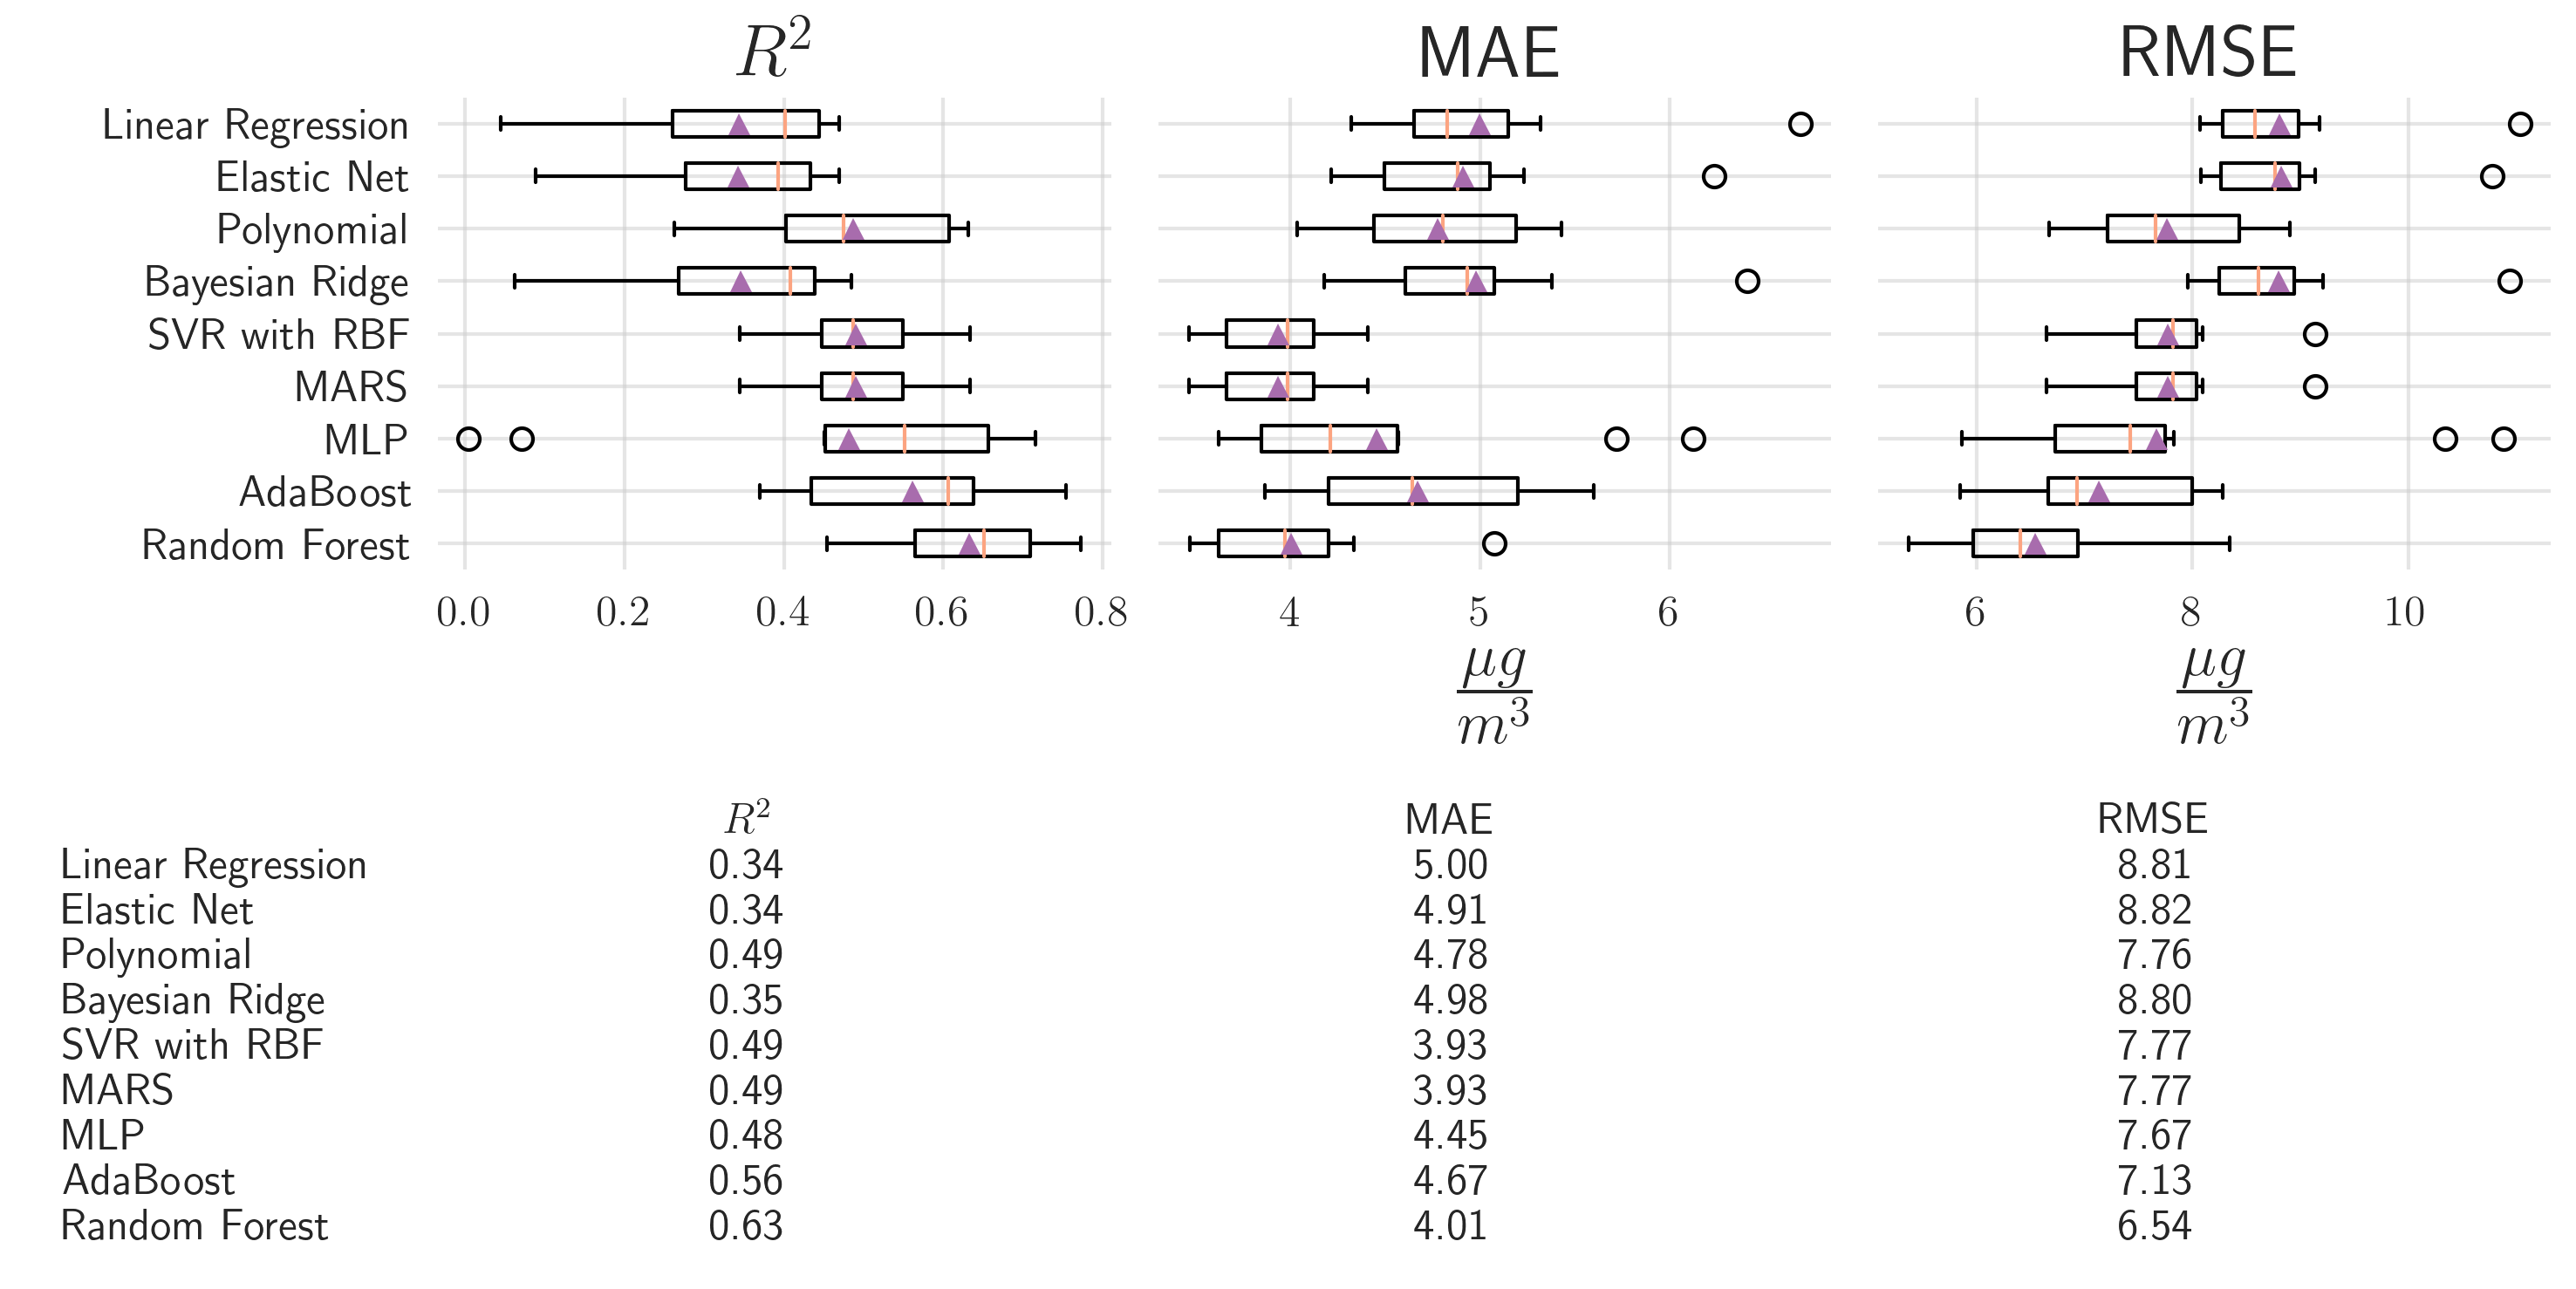

In [59]:
from matplotlib.gridspec import GridSpec

scores = [reg_scores, elastic_scores, polynomial_scores, bayesian_ridge_scores, svr_scores, mars_scores, mlp_scores, ada_scores, rf_scores]
labels=['Linear Regression', 'Elastic Net', 'Polynomial', 'Bayesian Ridge', 'SVR with RBF', 'MARS', 'MLP', 'AdaBoost', 'Random Forest']

fig = plt.figure(figsize=(10, 5.09), dpi=300)

gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

fs=12

r2_boxes = score_boxplot('test_r2', *scores, 
              title='$R^2$', labels=labels, ax=ax1, 
              tick_fontsize=fs)

mae_boxes = score_boxplot('test_neg_mean_absolute_error', *scores, 
              title='MAE', labels=labels, ax=ax2, 
              tick_fontsize=fs)

rmse_boxes = score_boxplot('test_neg_root_mean_squared_error', *scores, 
              title='RMSE', labels=labels, ax=ax3, 
              tick_fontsize=fs)

for boxes in [r2_boxes, mae_boxes, rmse_boxes]:
    for mean in boxes['means']:
        mean.set_markerfacecolor('#A86CAD')
    for median in boxes['medians']:
        median.set_color('#FCA481')
#     for flier in boxes['fliers']:
#         flier.set_markerfacecolor('#9CDEF6')
#         flier.set_markeredgecolor('#A86CAD')

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax2.set_yticklabels([])
ax3.set_yticklabels([])

plt.rc('text', usetex=True)
ax2.set_xlabel(r'$\frac{\mu g}{m^3}$', fontsize=24)
ax3.set_xlabel(r'$\frac{\mu g}{m^3}$', fontsize=24)

ax4.axis('off')
ax4.axis('tight')

even_color='#9CDEF6'
odd_color='#6549DA'

cell_text = []
for score in scores:
    vals = [f'{i:.2f}' for i in summarize_scores(score)]
    cell_text.append(vals)

table = ax4.table(cellText=cell_text,
                      rowLabels=labels,
                      colLabels=['$R^2$', 'MAE', 'RMSE'],
                      loc='best', edges='open', cellLoc='center')

fig.tight_layout()

# Persistence

In [44]:
import pickle

In [52]:
pickle.dump(
    {name: score for name, score in zip(labels, scores)},
    open('models/scores.p', 'wb'))

In [53]:
from joblib import dump

In [57]:
models = {
    "Random Forest": rf_grid,
    "Ada Boost": ada_grid,
    "MLP": mlp_grid,
    "MARS": mars_scores,
    "SVR": svr_grid,
    "Bayesian Ridge": bayesian_ridge,
    "Polynomial Regression": poly_grid,
    "Elastic Net": elastic,
    "Linear Regression": lm
}

for name, model in models.items():
    dump(model, f'models/{name}.joblib')